<a href="https://colab.research.google.com/github/kaylarobertson36/Social-Impact-final-project/blob/main/module9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/adult.csv')

df.head()


Saving adult.csv to adult.csv


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Clean data missing values
df.replace(' ?', pd.NA, inplace=True)
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# encode variables
label_encoders = {}
for column in data_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

# Split x and y
X = data_imputed.drop(columns=['income'])
y = data_imputed['income']

# Normalizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train[:5], y_train[:5]


(array([[ 1.4242213 ,  0.09005041,  1.22768308,  0.18133163, -0.42005962,
         -0.4062122 , -0.84486078, -0.90018084,  0.39366753,  0.70307135,
         -0.27902287, -0.20417671, -0.03112174,  0.29156857],
        [ 1.71757768,  0.09005041, -0.96627682,  1.21486874, -0.03136003,
          1.58555702,  1.28340665,  1.58932236,  0.39366753, -1.42233076,
         -0.27902287,  2.38123911, -0.60754665,  0.29156857],
        [-0.40925607,  0.09005041, -0.61464147, -0.33543693,  1.13473876,
         -0.4062122 ,  0.10103586, -0.90018084, -0.78447662,  0.70307135,
         -0.27902287, -0.20417671, -0.03112174, -3.7985878 ],
        [-1.06930792,  0.09005041, -0.84509736, -0.85220548,  0.74603917,
          0.92163395,  1.28340665,  0.96694656,  0.39366753,  0.70307135,
         -0.27902287, -0.20417671, -1.67805007,  0.29156857],
        [ 2.08427315,  1.46373585,  1.72909822,  0.18133163, -0.42005962,
         -0.4062122 , -1.3178091 ,  2.21169816,  0.39366753, -1.42233076,
         -0.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# models
knn = KNeighborsClassifier()
svm = SVC()
log_reg = LogisticRegression(max_iter=1000)

# Train KNN
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Train SVM
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Train Logistic Regression
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

# show results
results = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Logistic Regression'],
    'Accuracy': [knn_accuracy, svm_accuracy, log_reg_accuracy]
})

In [11]:
!pip install ace_tools as tools; tools.display_df_to_user(name="Model Performance Comparison", df=results)

/bin/bash: -c: line 1: syntax error near unexpected token `name="Model Performance Comparison",'
/bin/bash: -c: line 1: `pip install ace_tools as tools; tools.display_df_to_user(name="Model Performance Comparison", df=results)'


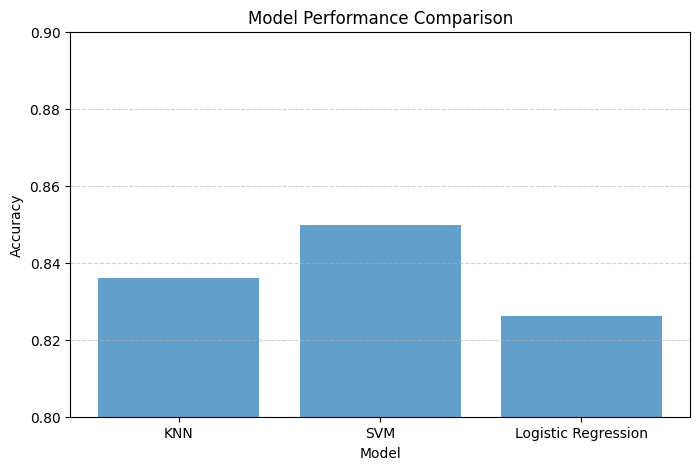

In [9]:
# view the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['Accuracy'], alpha=0.7)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.8, 0.9)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()